In [1]:
import numpy as np
import rpy2

import scanpy as sc
import numpy as np
import pandas as pd

import scanpy as sc
import anndata2ri
import logging
from scipy.sparse import issparse

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

In [2]:
rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

In [3]:
%%R
library(Seurat)
library(sctransform)
library(Hmisc)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In [4]:
import sklearn

In [4]:
%%R
data = readRDS("/gpfs/ysm/pi/zhao/tl688/GIANT/GIANT/src/analysis/cancer_datasaet/sce_datasets/sce_full_Zhengmix8eq.rds")

/gpfs/ysm/project/zhao/tl688/conda_envs/scglue/lib/python3.8/site-packages/anndata2ri/r2py.py:106: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(exprs, obs, var, uns, obsm or None, layers=layers)


In [5]:
%%R
str(data)

Formal class 'SingleCellExperiment' [package "SingleCellExperiment"] with 9 slots
  ..@ int_elementMetadata:Formal class 'DataFrame' [package "S4Vectors"] with 3 slots
  .. .. ..@ elementType    : chr "ANY"
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  .. .. ..$ rownames: symbol NULL
  .. .. ..$ nrows   : int 15716
  .. .. ..$ listData: Named list()
  ..@ int_colData        :Formal class 'DataFrame' [package "S4Vectors"] with 3 slots
  .. .. ..@ elementType    : chr "ANY"
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  .. .. ..$ rownames: symbol NULL
  .. .. ..$ nrows   : int 3994
  .. .. ..$ listData: Named list()
  ..@ int_metadata       :List of 1
  .. ..$ version:Classes 'package_version', 'numeric_version'  hidden list of 1
  .. .. ..$ : int [1:3] 1 0 0
  ..@ rowRanges          :Formal class 'GRangesList' [package "GenomicRanges"] with 3 slots
  .. .. ..@ elementMetadata:Formal class 'DataFrame' [package "S4Vectors"] with 3 slo

In [6]:
adata = ro.r("data")

/gpfs/ysm/project/zhao/tl688/conda_envs/scglue/lib/python3.8/site-packages/anndata2ri/r2py.py:106: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(exprs, obs, var, uns, obsm or None, layers=layers)


In [8]:
adata.write_h5ad("zheng8.h5ad")

In [127]:
sc.pp.normalize_total(adata, 1e4)
sc.pp.log1p(adata)

In [128]:
sc.pp.highly_variable_genes(adata)

In [129]:
adata = adata[:,adata.var.highly_variable]

In [130]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/gpfs/gibbs/project/zhao/tl688/conda_envs/scbenchmark/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


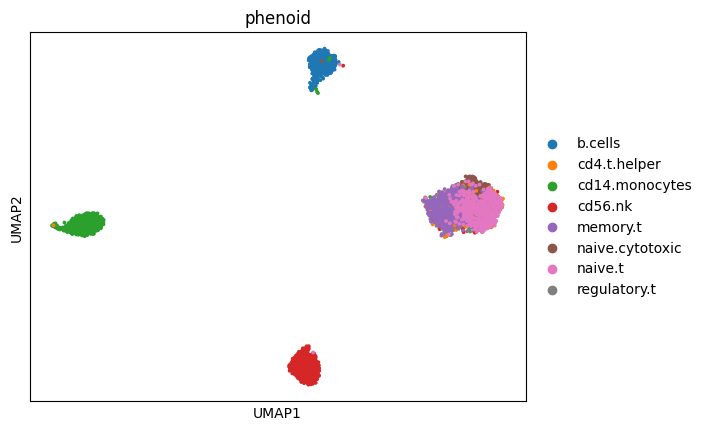

In [131]:
sc.pl.umap(adata, color = 'phenoid')

/gpfs/gibbs/project/zhao/tl688/conda_envs/scbenchmark/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


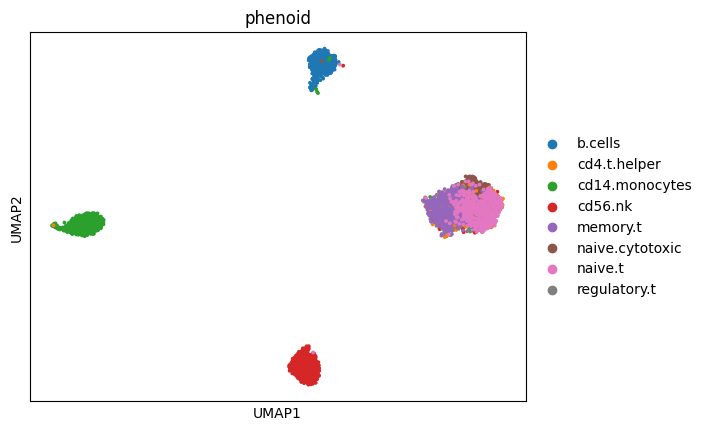

In [79]:
sc.pl.umap(adata, color = 'phenoid')

/gpfs/gibbs/project/zhao/tl688/conda_envs/scbenchmark/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


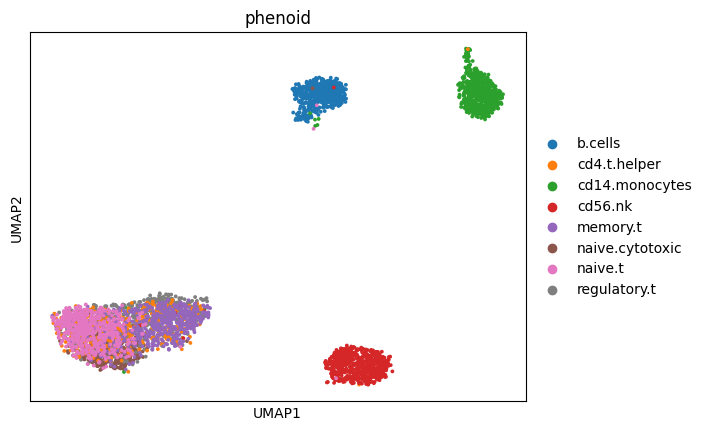

In [23]:
sc.pl.umap(adata, color = 'phenoid')

In [41]:
%%R 
seurat_obj = as.Seurat(data)
seurat_obj = RenameAssays(seurat_obj, originalexp = "RNA")
res = SCTransform(object=seurat_obj, vst.flavor = "v2", method = "glmGamPoi", verbose = FALSE)

In [42]:
%%R
str(res)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 2
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:2237724] 1 63 128 231 258 261 279 305 343 363 ...
  .. .. .. .. .. ..@ p       : int [1:3995] 0 427 767 1369 1779 2190 2652 3228 3657 4056 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 15716 3994
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:15716] "ENSG00000237683" "ENSG00000228327" "ENSG00000237491" "ENSG00000225880" ...
  .. .. .. .. .. .. ..$ : chr [1:3994] "b.cells1147" "b.cells6276" "b.cells6144" "b.cells6285" ...
  .. .. .. .. .. ..@ x       : num [1:2237724] 1 1 1 1 10 1 1 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         : num [1:15716, 1:3994] 0 1.19 0 0 0 ...
  .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. .. ..$ : chr [1:15716] 

In [53]:
gene_list = list(ro.r("rownames(res@assays$SCT@scale.data)"))
adata_new = ro.r("res@assays$SCT@scale.data")

In [57]:
gene_list

In [54]:
adata = adata[:,gene_list]
adata.X = adata_new.T

In [59]:
adata

View of AnnData object with n_obs × n_vars = 3994 × 3000
    obs: 'dataset', 'barcode', 'phenoid', 'total_features', 'log10_total_features', 'total_counts', 'log10_total_counts', 'pct_counts_top_50_features', 'pct_counts_top_100_features', 'pct_counts_top_200_features', 'pct_counts_top_500_features', 'is_cell_control', 'libsize.drop', 'feature.drop'
    var: 'id', 'symbol', 'is_feature_control', 'mean_counts', 'log10_mean_counts', 'rank_counts', 'n_cells_counts', 'pct_dropout_counts', 'total_counts', 'log10_total_counts'
    uns: 'log.exprs.offset'
    obsm: 'X_pca', 'X_tsne'
    layers: 'logcounts', 'normcounts'

In [60]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/gpfs/gibbs/project/zhao/tl688/conda_envs/scbenchmark/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


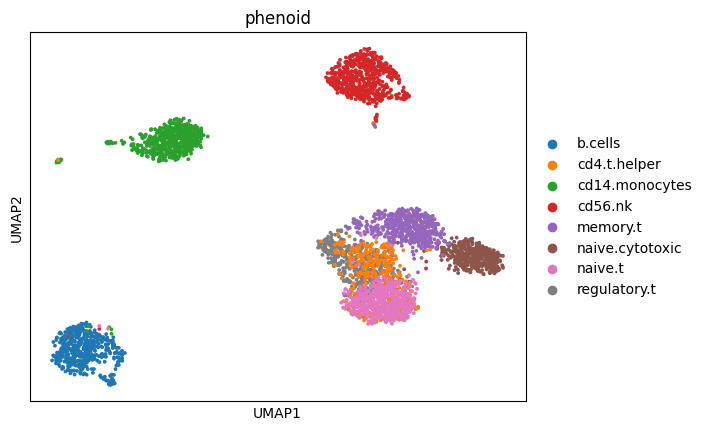

In [61]:
sc.pl.umap(adata, color = 'phenoid')